In [1]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import time

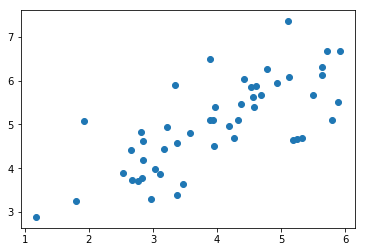

In [2]:
X = scipy.io.loadmat('ex7data1.mat')['X']
plt.scatter(X[:,0],X[:,1]);

In [3]:
def featureNormalizwe(X):
    mu = np.mean(X,0)
    std = np.std(X,0)
    
    X_norm = (X - mu)/std
    return X_norm, mu, std

def pca(X_norm):
    cov = X_norm.T.dot(X_norm)/X_norm.shape[0]
    U, S, V = np.linalg.svd(cov)
    return U, S

In [4]:
X_norm, mu, std = featureNormalizwe(X)
U,S = pca(X_norm)

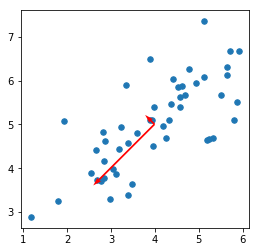

In [5]:
plt.scatter(X[:,0],X[:,1],s = 30);
#plt.plot([mu[0],mu[0]+S[0]*U[0,0]],[mu[1],mu[1]+S[0]*U[1,0]])
#plt.plot([mu[0],mu[0]+S[0]*U[0,1]],[mu[1],mu[1]+S[0]*U[1,1]])
plt.gca().set_aspect('equal')
plt.quiver(mu[0], mu[1], U[0,0], U[0,1], scale=S[1]*10,color='r')
plt.quiver(mu[0], mu[1], U[1,0], U[1,1], scale=S[0]*10,color='r');

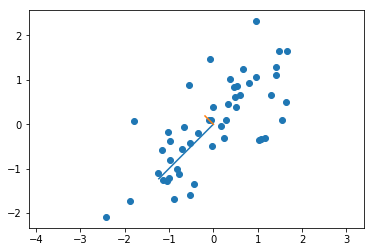

In [6]:
plt.scatter(X_norm[:,0],X_norm[:,1]);
plt.plot([0,S[0]*U[0,0]],[0,S[0]*U[1,0]])
plt.plot([0,S[1]*U[0,1]],[0,S[1]*U[1,1]])
#plt.set_aspect('equal', 'box')
plt.axis('equal');

In [7]:
def projectData(X_norm,U,K):
    Z = X_norm.dot(U[:,:K])    
    return Z

def recoverData(Z,U,K):
    X_recovered = Z.dot(U[:,:K].T)    
    return X_recovered

def drawProjection(X_norm, X_recovered):
    plt.figure(figsize = [6,6])
    plt.scatter(X_norm[:,0],X_norm[:,1]);
    plt.scatter(X_recovered[:,0],X_recovered[:,1]);
    plt.gca().set_aspect('equal')
    for i in range(X_norm.shape[0]):
        plt.plot([X_norm[i,0],X_recovered[i,0]],[X_norm[i,1],X_recovered[i,1]],'k--') 

In [8]:
Z = projectData(X_norm,U,1)
X_recovered = recoverData(Z,U,1)

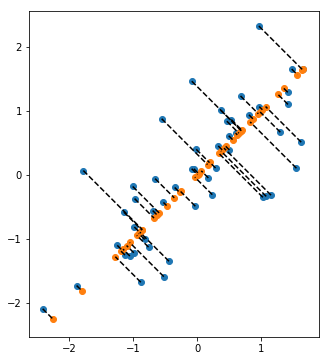

In [9]:
drawProjection(X_norm, X_recovered)

# Face Dataset PCA

In [10]:
X = scipy.io.loadmat('ex7faces.mat')['X']

In [11]:
X.shape

(5000, 1024)

In [12]:
def displayFaces(X):
    m = X.shape[0];
    pixels = X.shape[1]
    pixel_row = np.sqrt(pixels).astype(int)
    
    row = np.sqrt(m).astype(int)
    col = np.ceil(m/row).astype(int)
    fig, ax_array = plt.subplots(row, col,figsize = [row,col])
    i = 0;
    for ax in ax_array.ravel():
        ax.axis('off')
        if i>=m:
            img = np.ones([pixel_row,pixel_row])
            ax.imshow(img,cmap = "gray")
            continue
        ax.imshow(X[i,:].reshape([pixel_row,-1]).T,cmap = "gray")        
        i += 1

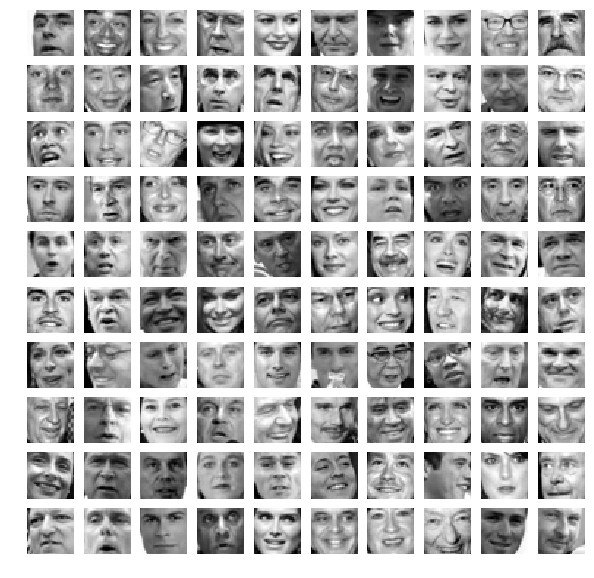

In [13]:
displayFaces(X[1000:1100,:])

In [14]:
X_norm, mu, std = featureNormalizwe(X)
U,S = pca(X_norm)

In [15]:
U.shape

(1024, 1024)

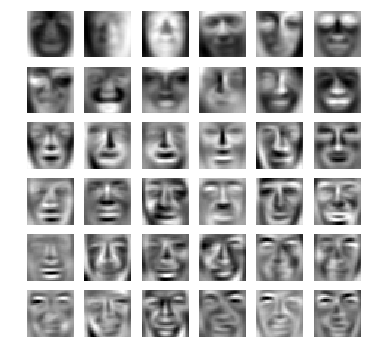

In [16]:
displayFaces(U[:,:36].T)

In [17]:
K = 200;
Z = projectData(X_norm,U,K)
X_recovered = recoverData(Z,U,K)

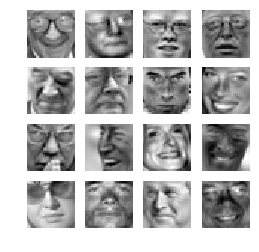

In [18]:
displayFaces(X_norm[:16,:])

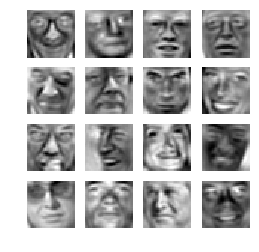

In [19]:
displayFaces(X_recovered[:16,:])